In [276]:
!pwd

/home/surya


In [145]:
import pandas as pd
import numpy as np
import json
from pandas import DataFrame
from pandas.io.json import json_normalize
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import nltk
import string
import re
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [146]:
df = pd.read_excel("/home/surya/Nightingale_Chat.xlsx",sheet_name = "All", header=0)
print(df.rating.value_counts())
# df.columns

low       588
high      521
medium    453
Name: rating, dtype: int64


In [147]:
print(pd.concat([df.head(), df.tail()]))

                                           patient_chat rating
0     female, 55 years, 75 kg and obese. hypertensiv...   high
1     I'm 22 and male and I have gotten terrible mig...   high
2     My wife is constantly suffering from high bloo...   high
3     I get head aches multiple time times a week I'...   high
4     I recently suffered a substantial loss of belo...   high
1557   Hello John,How can I help to you Low headache...    low
1558   Hello John,How can I help to you headache Com...    low
1559   Hello John,How can I help to you Sever headac...    low
1560   Hello John,How can I help to you I take toomu...    low
1561   Hello John,How can I help to you What causes ...    low


In [154]:
stop_words = set(stopwords.words('english'))
discard_words = {'not' , 'no'}
stop_words = stop_words - discard_words

In [155]:
type(stop_words)
print(stop_words)

{'my', 'y', 'why', 'after', 'should', 'hadn', 'theirs', 't', 'our', 'yourself', 'or', 'when', 'off', 'i', 'had', 'can', 'shan', 'these', 'until', "couldn't", 'is', 'ain', 'she', 'ma', 'weren', 'under', 'd', 'this', "mightn't", 'there', 'each', "wouldn't", 'over', 'such', 'shouldn', "aren't", 'now', 'during', 'an', "that'll", 'are', 'will', 'both', 'on', 'the', 'didn', 'those', 'aren', 'which', 'their', 'more', "you'll", 'needn', 'into', 'up', 'don', "shouldn't", 'its', 'below', 'himself', 'of', 'you', 'and', 'for', 'm', 'in', 'here', 'your', "isn't", "weren't", "don't", "you'd", 'between', 'itself', 'because', 'isn', 'any', "doesn't", 'we', 'hers', 'mightn', "shan't", "haven't", 'mustn', 'it', 'who', 'were', "mustn't", 've', 'at', 'once', "needn't", "wasn't", 'against', 'out', 'further', 'where', 'whom', 'than', 'do', 'but', 're', 'did', 'haven', "she's", 'other', 'above', 'being', 'few', 'so', 'him', 'all', 'wasn', 'before', 'been', 'how', 'them', 'that', 'a', 'about', "should've", "h

In [156]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'sam

In [278]:
293*64

18752

In [157]:
def load_file(filename):
    with open(filename) as f:
        d = json.load(f)
        df = DataFrame(d)
        f.close()
    return df

punc_ = set(string.punctuation)

In [158]:
def clean_document(doc) :
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stop_words = set(stopwords.words('english'))
    tokens = doc.lower().split()
#     tokens = [w for w in tokens if '@' not in w]
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha() or word.isalnum()]
    stop_words = set(stopwords.words('english'))
    #remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in punc_]
    tokens = [re.sub('[^A-Za-z0-9]+', '', word)  for word in tokens]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

def preprocess_documents(docs):
    clean_docs = [clean_document(doc) for doc in docs]
    return clean_docs

In [277]:
!nvidia-smi

Wed Jun  5 11:13:17 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.48                 Driver Version: 410.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro P5000        Off  | 00000000:61:00.0 Off |                  Off |
| 26%   39C    P0    39W / 180W |      0MiB / 16278MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [159]:
docs = list(df.patient_chat)
clean_docs = preprocess_documents(docs)

## Define Vocobulary

In [160]:
vocab = Counter()

# load doc and add to vocab
def add_doc_to_vocab(doc,vocab):
    vocab.update(doc)
    return vocab

# load all docs in a directory
def process_docs(clean_docs, vocab):
    for doc in clean_docs:
        vocab = add_doc_to_vocab(doc, vocab)
    return vocab

vocab = process_docs(clean_docs, vocab)

# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

3074


### TOtal Vocobulary : 2960

In [161]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
    
# save tokens to a vocabulary file
save_list(tokens, 'nightingale_vocab.txt')

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# load doc, clean and return line of tokens
def doc_to_line(doc, vocab):
    # filter by vocab
    tokens = [w for w in doc if w in vocab]
    return ' '.join(tokens)

In [162]:
# load the vocabulary
vocab_filename = 'nightingale_vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [163]:
clean_doc_voc = []
for doc in clean_docs:
    clean_doc_voc.append(doc_to_line(doc, vocab))
    
df["clean_doc_voc"] = clean_doc_voc

In [164]:
df.rating  = df.rating.map({'low':0, 'medium':1, 'high' : 2})

In [165]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
train, test = train_test_split(df[["clean_doc_voc","rating" ]], test_size=0.2)

xtrain_docs , y_train_docs= train["clean_doc_voc"] , train["rating"]
xtest_docs , y_test_docs= test["clean_doc_voc"] , test["rating"]

In [166]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [167]:
# encode data
tokenizer = create_tokenizer(xtrain_docs)
Xtrain = tokenizer.texts_to_matrix(xtrain_docs, mode='freq' )
print(len(tokenizer.word_index))
Xtest = tokenizer.texts_to_matrix(xtest_docs, mode='freq')
print(len(tokenizer.word_index))

3022
3022


In [168]:
len(tokenizer.word_index)

3022

In [169]:
print((Xtrain.shape ,y_train_docs.shape))
print((xtest_docs.shape, y_test_docs.shape))

((1249, 3023), (1249,))
((313,), (313,))


In [170]:
len(set(tokenizer.word_index))

3022

In [171]:
y_train_docs[:4]

831     0
961     0
1042    0
742     1
Name: rating, dtype: int64

In [172]:
n_words = Xtest.shape[1]
n_words

3023

In [173]:
Xtrain.shape[1]

3023

In [174]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [175]:
n_words

3023

In [176]:
model = define_model(n_words)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 50)                151200    
_________________________________________________________________
dense_94 (Dense)             (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________


In [177]:
len(set(vocab))

3074

In [178]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=10, verbose=0)

In [179]:
model.save("nightingale_freq.h5")

In [180]:
import pickle

def save_tokenizer_file(object_, filename):
    # saving
    with open(filename, 'wb') as handle:
        pickle.dump(object_, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer_file(filename):
    # loading
    with open(filename, 'rb') as handle:
        tokenizer = pickle.load(handle)
        return tokenizer
    return null
save_tokenizer_file(tokenizer,"tokenizer.pkl")

In [181]:
# evaluate
loss, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 64.536741


In [182]:
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [183]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=100, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [184]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(xtrain_docs, xtest_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, to_categorical(y_train_docs), Xtest, to_categorical(y_test_docs))
    # summarize results
    # Comparing Word Scoring Methods
    print(results.describe())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 50)                151200    
_________________________________________________________________
dense_96 (Dense)             (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.7156549513149566
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 50)                151200    
_________________________________________________________________
dense_98 (Dense)             (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
2 accuracy: 0.7028754016461845
__

3 accuracy: 0.4185303512472695
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 50)                151200    
_________________________________________________________________
dense_122 (Dense)            (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.4185303512472695
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 50)                151200    
_________________________________________________________________
dense_124 (Dense)            (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
5 

6 accuracy: 0.4185303512472695
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 50)                151200    
_________________________________________________________________
dense_148 (Dense)            (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.4185303512472695
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 50)                151200    
_________________________________________________________________
dense_150 (Dense)            (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
8 

9 accuracy: 0.6741214063220893
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 50)                151200    
_________________________________________________________________
dense_174 (Dense)            (None, 3)                 153       
Total params: 151,353
Trainable params: 151,353
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.6741214080359608
          binary         count         tfidf       freq
count  10.000000  1.000000e+01  1.000000e+01  10.000000
mean    0.707668  4.185304e-01  4.185304e-01   0.680511
std     0.006943  5.851389e-17  5.851389e-17   0.008249
min     0.699681  4.185304e-01  4.185304e-01   0.667732
25%     0.702875  4.185304e-01  4.185304e-01   0.674920
50%     0.706070  4.185304e-01  4.185304e-01   0.678914
75%     0.712460  4.185304e-01  4.185304e-01   0.687700
max     0.718850  4.1

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline

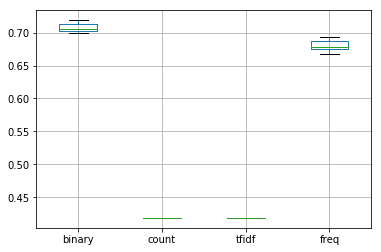

In [186]:
results.boxplot()
plt.show()

In [187]:
###  Predict New Sentiment

In [188]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
#     tokens = clean_doc(review)
    
    tokens = clean_document(text)
    print(tokens)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    max_index = np.argmax(yhat[0])
    print(yhat[0])
    print(yhat[0][max_index])
    # retrieve predicted percentage and label
    percent_pos = yhat[0][max_index]
    if max_index == 0 : 
        return (percent_pos), '0'
    
    if max_index == 1 : 
        return (percent_pos), '1'
    if max_index == 2 : 
        return (percent_pos), '2'
    return "NA"

In [193]:
# test positive text
text = "my leg is getting hell lot of pain whihch is un imaginable blood due to pain!!"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'getting', 'hell', 'lot', 'pain', 'whihch', 'un', 'imaginable', 'blood', 'due', 'pain']
[0.07367576 0.18888555 0.6332315 ]
0.6332315


(0.6332315, '2')

In [194]:
# test positive text
text = "my leg is paining alot and it is severe, couldn't bear any more"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.11229624 0.42249006 0.29615688]
0.42249006


(0.42249006, '1')

In [195]:
# test positive text
# text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

['leg', 'paining', 'alot', 'severe', 'couldnt', 'bear']
[0.11229624 0.42249006 0.29615688]
0.42249006
Review: [my leg is paining alot and it is severe, couldn't bear any more]
Sentiment: 1 (42.249%)
['bad', 'movie']
[0.5570071  0.25768185 0.03741346]
0.5570071
Review: [This is a bad movie.]
Sentiment: 0 (55.701%)


In [196]:
vocab_size

2883

In [197]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [198]:
len(vocab)

3074

In [199]:
# xtrain_docs

In [200]:
max_length = max([len(s.split()) for s in xtrain_docs])
max_length

103

In [201]:
vocab_size = len(set(vocab))
len(set(vocab))

3074

In [202]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Embedding , Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [203]:
# define modela
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 103, 300)          922200    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 96, 32)            76832     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 41, 32)            8224      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 13, 32)            8224      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 6, 32)             0         
__________

In [204]:
encoded_docs = tokenizer.texts_to_sequences(xtrain_docs)

In [205]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [206]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [207]:
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 103, 300)          922200    
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 96, 32)            76832     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 41, 32)            8224      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 20, 32)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 13, 32)            8224      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 6, 32)             0         
__________

In [208]:
len(xtrain_docs) , len(y_train_docs)

(1249, 1249)

In [209]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=20, verbose=2)
# save the model
# model.save('model_nightingale.h5')

Epoch 1/20
 - 5s - loss: 1.0788 - acc: 0.4171
Epoch 2/20
 - 1s - loss: 0.9544 - acc: 0.5324
Epoch 3/20
 - 1s - loss: 0.7532 - acc: 0.6918
Epoch 4/20
 - 1s - loss: 0.5635 - acc: 0.7942
Epoch 5/20
 - 1s - loss: 0.3820 - acc: 0.8575
Epoch 6/20
 - 1s - loss: 0.2980 - acc: 0.8935
Epoch 7/20
 - 1s - loss: 0.2138 - acc: 0.9279
Epoch 8/20
 - 1s - loss: 0.1514 - acc: 0.9488
Epoch 9/20
 - 1s - loss: 0.1162 - acc: 0.9552
Epoch 10/20
 - 1s - loss: 0.1188 - acc: 0.9576
Epoch 11/20
 - 1s - loss: 0.0923 - acc: 0.9672
Epoch 12/20
 - 1s - loss: nan - acc: 0.9047
Epoch 13/20
 - 1s - loss: nan - acc: 0.3659
Epoch 14/20
 - 1s - loss: nan - acc: 0.3659
Epoch 15/20
 - 1s - loss: nan - acc: 0.3659
Epoch 16/20
 - 1s - loss: nan - acc: 0.3659
Epoch 17/20
 - 1s - loss: nan - acc: 0.3659
Epoch 18/20
 - 1s - loss: nan - acc: 0.3659
Epoch 19/20
 - 1s - loss: nan - acc: 0.3659
Epoch 20/20
 - 1s - loss: nan - acc: 0.3659


In [210]:
import pickle

def save_tokenizer_file(object_, filename):
    # saving
    with open(filename, 'wb') as handle:
        pickle.dump(object_, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer_file(filename):
    # loading
    with open(filename, 'rb') as handle:
        tokenizer = pickle.load(handle)
        return tokenizer
    return null

In [211]:
# load the model
from keras.models import load_model
# save the model
model.save('ng_model_epch20.h5')
# model = load_model('model_multi_nightingale.h5')

In [212]:
!pwd

/home/surya


In [213]:
save_tokenizer_file(tokenizer, 'tokenizer.pkl')
tokenizer = load_tokenizer_file('tokenizer.pkl')
tokenizer

In [214]:
def save_file(data, filename):
    dump(data,filename)
    print('Saved: %s' % filename)

#########################

In [215]:
text = " Hello John,How can I help to you What causes headaches?please let me know Is it a throbbing headache?  How does bending forward affect your headache?  How would you describe the intensity of your headache?  Do you become frustrated or upset easily?  Have you recently used any drugs in any form?  Do you experience day time sleep?  Do you tend to drink alcohol heavily?  Are you feeling agitated and physically restless? "

In [216]:
tokens = clean_document(text)
print(tokens)
# filter by vocab
tokens = [w for w in tokens if w in vocab]
# # convert to line
line = ' '.join(tokens)
line

# # encode
# encoded = tokenizer.texts_to_matrix([line], mode='freq')
# # predict sentiment
# yhat = model.predict(encoded, verbose=0)

['hello', 'johnhow', 'help', 'causes', 'headachesplease', 'let', 'know', 'throbbing', 'headache', 'bending', 'forward', 'affect', 'headache', 'would', 'describe', 'intensity', 'headache', 'become', 'frustrated', 'upset', 'easily', 'recently', 'used', 'drugs', 'form', 'experience', 'day', 'time', 'sleep', 'tend', 'drink', 'alcohol', 'heavily', 'feeling', 'agitated', 'physically', 'restless']


'hello johnhow help causes headachesplease let know throbbing headache bending forward affect headache would describe intensity headache become frustrated upset easily recently used drugs form experience day time sleep tend drink alcohol heavily feeling agitated physically restless'

#########################

In [217]:
max_length

103

In [218]:
enc_docs = encode_docs(tokenizer, max_length, [line])

In [219]:
# list(stopwords)

In [220]:
output_arr = model.predict(enc_docs)
# output_arr[]
output_arr.argmax()
output_arr[0][0]

nan

In [221]:
# _, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)

In [222]:
Xtrain

array([[ 238,  453,   21, ...,    0,    0,    0],
       [ 775,   18,   13, ...,    0,    0,    0],
       [ 296,   20,   13, ...,    0,    0,    0],
       ...,
       [ 163,  652, 1177, ...,    0,    0,    0],
       [   2,  140,    2, ...,    0,    0,    0],
       [  86,  241,  155, ...,    0,    0,    0]], dtype=int32)

In [223]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)

In [229]:
# !ls

In [230]:
from pickle import dump
# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)
    # load and clean all reviews
#     train_docs, ytrain = load_clean_dataset(True)
#     test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([Xtrain, to_categorical(y_train_docs)], 'train_nightingale.pkl')
save_dataset([Xtest, to_categorical(y_test_docs)], 'test_nightingale.pkl')   


Saved: train_nightingale.pkl
Saved: test_nightingale.pkl


In [231]:
from pickle import load
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
trainLines, trainLabels = load_dataset('train.pkl')

In [232]:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [233]:
# %load multichannel.png

In [234]:
vocab_size = len(tokenizer.word_index) + 1

In [235]:
vocab_size

3023

In [236]:
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [237]:
trainLines
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [238]:
length = max_length
from numpy import array
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.merge import concatenate
from keras.models import Model

In [239]:
len(trainLabels) , len(xtrain_docs)  , len(y_train_docs)
# len(trainX)

(11712, 1249, 1249)

In [240]:
trainLabels = to_categorical(y_train_docs)

In [241]:
len(y_train_docs)

1249

In [242]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 103, 300)     906900      input_4[0][0]                    
__________________________________________________________________________________________________
embedding_

In [243]:
# fit model
history = model.fit([trainX,trainX,trainX], array(trainLabels), epochs=20, batch_size=16)

Epoch 1/20
1249/1249 [==============================] - 8s 6ms/step - loss: 1.0550 - acc: 0.4412
Epoch 2/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.7849 - acc: 0.6733
Epoch 3/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.3811 - acc: 0.8647
Epoch 4/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.1544 - acc: 0.9472
Epoch 5/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0946 - acc: 0.9664
Epoch 6/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0836 - acc: 0.9696
Epoch 7/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0648 - acc: 0.9744
Epoch 8/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0608 - acc: 0.9688
Epoch 9/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0497 - acc: 0.9744
Epoch 10/20
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0515 - acc: 0.9728
Epoch 11/20
1249/1249 [======

In [244]:
model.save('ng_model_model_multiinput.h5')

In [245]:
model.predict([enc_docs,enc_docs,enc_docs])

array([[0.05257658, 0.01467865, 0.01347747]], dtype=float32)

In [246]:
# load the model
from keras.models import load_model
# save the model
model.save('model_multi_nightingale.h5')
model = load_model('model_multi_nightingale.h5')

In [247]:
testX  = encode_docs(tokenizer, max_length, xtest_docs)

In [248]:
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX],to_categorical(y_test_docs), verbose=2)
print('Test Accuracy: %.2f' % (acc*100))

Train Accuracy: 97.52
Test Accuracy: 72.52


#### Build vocab with weights for embedding space generation

In [249]:
import pandas as pd
import numpy as np
from numpy import   asarray,zeros
# load the whole embedding into memory
embeddings_index = dict()
# f = open('/home/surya/cs224n-Squad-Project/data/glove.6B.100d.txt')
f = open('/root/data/glove/glove.6B.300d.txt')


for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [250]:
vocab_size

3023

In [251]:
docs[0]

'female, 55 years, 75 kg and obese. hypertensive 160/110 Hg. doctor prescribes olmesartan , suffering severe headache'

In [252]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(clean_doc_voc)
vocab_size = len(t.word_index) + 1
vocab_size

3075

In [253]:
a = "0.41711,-0.10176,0.058147,-0.18332,-0.44458,-0.17852,-0.34392,-0.077147,0.58521,-0.52752,1.4831,0.9531,-0.027201,-0.31748,-0.23046,-0.24083,0.22548,-0.12685,-0.17578,-0.34924,0.5168,0.86818,-0.018579,1.2228,-0.52477,-0.26369,0.25925,-0.059529,0.27063,0.13036,-0.67677,0.48313,-0.16343,-0.069899,0.92846,-0.44196,-0.078755,0.5246,-0.59577,-0.1659,0.35194,0.30031,-0.50711,0.29111,-0.26332,-1.0523,-0.31061,-0.077155,-0.16019,0.26994,-1.1042,0.16292,0.79396,-0.77135,-0.95157,-0.55992,0.69163,0.021495,0.44292,-0.69881, 0.73889,-0.1064,-0.44058,0.17116,0.39109,0.043652, 1.2835,0.29026,0.51037,-0.19631,0.036696  -0.74017,-0.0035271 -0.54918,-0.25002,0.15853,0.71764,-0.28083, 0.42292,-0.89855,0.99665,-0.65188,-0.11919,-0.28617,-0.85273,0.55656,-0.23601,-0.43822,0.36317,0.45724, 0.38596,0.59233,1.4355,1.4563,1.1801,0.32987, 0.84998,-0.29444,-0.039114,0.39534".split(",")

a = np.array(a)
len(a)

98

In [254]:
# embedding_matrix = zeros((vocab_size, 100))
embedding_matrix = zeros((vocab_size, 300))

for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
#     print((word,i),embedding_vector)
if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [255]:
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)

###  ADD USER DEFINED EMBEDDING FROM GLOVE 

In [256]:
embedding_matrix.shape

(3075, 300)

In [257]:
%timeit 
# np.isnan(data)[np.isnan(data) == False].size
np.isnan(embedding_matrix)[np.isnan(embedding_matrix) == False].size

922500

In [258]:
# t.word_index.items()

In [259]:
# embedding_matrix
np.sum(~embedding_matrix.any(1))

3075

In [260]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [261]:
# define the model
def define_model(vocab_size, max_length , custom_embed = True):
    model = Sequential()
#     model.add(Embedding(vocab_size, 100, input_length=max_length))
#     model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length , trainable=False))
    model.add(Embedding(vocab_size, 300, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    print("Hello!!!!!!!!!")
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
#     model.layers[0].set_weights([embedding_matrix])
#     model.layers[0].trainable = False
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [262]:
#    #load different embedding file from Kaggle depending on which embedding 
#         #matrix we are going to experiment with
#         if typeToLoad=="glove":
#             EMBEDDING_FILE='../input/glove-twitter/glove.twitter.27B.25d.txt'
#             embed_size = 25
#         elif(typeToLoad=="word2vec"):
#             word2vecDict = word2vec.KeyedVectors.load_word2vec_format("../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)
#             embed_size = 300
#         elif(typeToLoad=="fasttext"):
#             EMBEDDING_FILE='../input/fasttext/wiki.simple.vec'
#             embed_size = 300

#         if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
#             embeddings_index = dict()
#             #Transfer the embedding weights into a dictionary by iterating through every line of the file.
#             f = open(EMBEDDING_FILE)
#             for line in f:
#                 #split up line into an indexed array
#                 values = line.split()
#                 #first index is word
#                 word = values[0]
#                 #store the rest of the values in the array as a new array
#                 coefs = np.asarray(values[1:], dtype='float32')
#                 embeddings_index[word] = coefs #50 dimensions
#             f.close()
#             print('Loaded %s word vectors.' % len(embeddings_index))
#         else:
#             embeddings_index = dict()
#             for word in word2vecDict.wv.vocab:
#                 embeddings_index[word] = word2vecDict.word_vec(word)
#             print('Loaded %s word vectors.' % len(embeddings_index))
            
#         gc.collect()
#         #We get the mean and standard deviation of the embedding weights so that we could maintain the 
#         #same statistics for the rest of our own random generated weights. 
#         all_embs = np.stack(list(embeddings_index.values()))
#         emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
#         nb_words = len(tokenizer.word_index)
#         #We are going to set the embedding size to the pretrained dimension as we are replicating it.
#         #the size will be Number of Words in Vocab X Embedding Size
#         embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
#         gc.collect()

#         #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
#         #our own dictionary and loaded pretrained embedding. 
#         embeddedCount = 0
#         for word, i in tokenizer.word_index.items():
#             i-=1
#             #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
#             embedding_vector = embeddings_index.get(word)
#             #and store inside the embedding matrix that we will train later on.
#             if embedding_vector is not None: 
#                 embedding_matrix[i] = embedding_vector
#                 embeddedCount+=1
#         print('total embedded:',embeddedCount,'common words')
        
#         del(embeddings_index)
#         gc.collect()
        
#         #finally, return the embedding matrix
#         return embedding_matrix

In [263]:
max_length

103

In [268]:
model = define_model(vocab_size,max_length,True)
model.fit(Xtrain, to_categorical(y_train_docs), epochs=80, verbose=2, validation_split=0.1)

Hello!!!!!!!!!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 103, 300)          922500    
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 96, 32)            76832     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1536)              0         
_________________________________________________________________
dense_185 (Dense)            (None, 10)                15370     
_________________________________________________________________
dense_186 (Dense)            (None, 3)                 33        
Total params: 1,014,735
Trainable params: 1,014,735
Non-trainable params: 0
___________________________________________________

In [269]:
model.metrics_names

['loss', 'acc']

dict_keys(['loss', 'acc'])


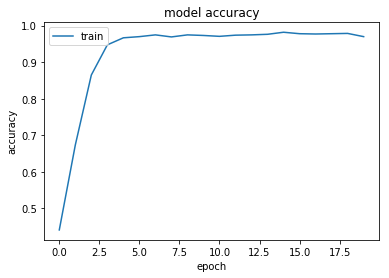

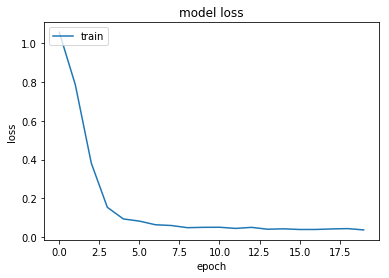

In [270]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [271]:
# # This tutorial is divided into the following parts:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 300)(inputs1)
#     embedding1 = Embedding(vocab_size,  300, weights=[embedding_matrix], trainable=False)(inputs1)
#         model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length , trainable=False))

    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 300)(inputs2)
#     embedding2 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 300)(inputs3)
#     embedding3 = Embedding(vocab_size, 100)(embedding3)
#     embedding3 = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(inputs3)

    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [272]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)

In [273]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(trainLabels), epochs=100, batch_size=16 , )

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 103)          0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 103, 300)     922500      input_7[0][0]                    
__________________________________________________________________________________________________
embedding_

1249/1249 [==============================] - 3s 2ms/step - loss: 0.0381 - acc: 0.9768
Epoch 36/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0353 - acc: 0.9744
Epoch 37/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0345 - acc: 0.9760
Epoch 38/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0374 - acc: 0.9760
Epoch 39/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0350 - acc: 0.9760
Epoch 40/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0341 - acc: 0.9776
Epoch 41/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0339 - acc: 0.9824
Epoch 42/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0345 - acc: 0.9768
Epoch 43/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0334 - acc: 0.9816
Epoch 44/100
1249/1249 [==============================] - 3s 2ms/step - loss: 0.0331 - acc: 0.9784
Epoch 45/100
1249/1249 

In [274]:
keras_model = model
import tensorflow as tf

In [275]:
! ls -ltr /home/surya/model_multi_nightingale.h5

-rw-r--r--. 1 root root 35354088 May 31 16:26 /home/surya/model_multi_nightingale.h5


In [ ]:
# saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")


In [ ]:

!pwd

In [ ]:
with tf.keras.backend.get_session() as sess:
    tf.saved_model.simple_save(
        sess,
        "export_path",
        inputs={'input': keras_model.input},
        outputs={'output': keras_model.output})

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
keras.experimental.export_saved_model(model, '/home/surya/saved_model')


In [ ]:
# Export the model to a SavedModel
keras.experimental.export_saved_model(model, 'path_to_saved_model')

# Recreate the exact same model
new_model = keras.experimental.load_from_saved_model('path_to_saved_model')

# Check that the state is preserved
new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, atol=1e-6)

# Note that the optimizer state is preserved as well:
# you can resume training where you left off.

In [ ]:


with mlflow.start_run() as run:
    mlflow.keras.log_model(model, "models")

In [ ]:
# model
mlflow.keras.save_model(model, "models_keras")

In [ ]:
>>> import mlflow
>>> # Build, compile, and train your model
>>> keras_model = ...
>>> keras_model_path = ...
>>> keras_model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
>>> results = keras_model.fit(
...     x_train, y_train, epochs=20, batch_size = 128, validation_data=(x_val, y_val))
... # Save the model as an MLflow Model
>>> mlflow.keras.save_model(keras_model, keras_model_path)